# iris 데이터를 통한 기본적인 군집분석 원리와 분석과정 연습

### 군집분석이란?
- unsupervised learning으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러가지가 있다.

### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 컬럼명 변경
column_name_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# iris_df.columns = column_name_list

columns_replace_dict = {k:v for k, v in zip(iris.feature_names, column_name_list)}

In [6]:
iris_df.rename(columns_replace_dict, axis="columns", inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# target 컬럼 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_df.target.unique()

array([0, 1, 2])

In [11]:
### 결측값 확인
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [16]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [17]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
import plotly.express as px
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [20]:
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [21]:
# 다른 컬럼으로 만들기
fig=px.scatter(iris_df, x='petal_length', y='petal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

### K-Means 알고리즘

In [22]:
from sklearn.cluster import KMeans

In [23]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

120 30


In [25]:
# 5개의 그룹으로 clustering
km = KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
km.fit(train_x)
clusters_array = km.labels_

In [29]:
# 실제 iris 데이터의 그룹과 훈련된 cluster의 결과를 비교
compare_clusters = dict(zip(clusters_array, train_y))
compare_clusters

{0: 1, 1: 2, 2: 0, 3: 2, 4: 1}

In [31]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['petal_width'], y=train_x['petal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [32]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['sepal_width'], y=train_x['sepal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

- 각 클러스터의 중심점에서 데이터 간의 거리를 합한 수치

In [39]:
# Sum of squared distances of samples to their closest cluster center. 
km.inertia_ 

34.540198412698416

### 최적의 k 찾기 (Elbow method)
- unsupervised 방법으로 실제 k의 수는 정해져있지 않기에 최적의 k를 찾는 것부터 시작.

  > Elbow method란?
  
  > Total intra-cluster variation(or total within-cluster sum of suqare(=WSS))가 최소가 되는 k를 찾는 방법.

In [41]:
# k와 sum of squared distsances from each point의 합(distortion)을 비교

distortions = []
k_range = range(1, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

1
2
3
4
5
6
7
8
9
10
[501.49925, 114.30816714150048, 59.499186507936514, 41.86535079365079, 34.530706179441474, 29.205514890166597, 25.207746491573218, 21.62620172893132, 19.802496810207337, 18.40667261904762]


In [42]:
# x축이 k의 수, y축이 distortions인 line plot 그리기
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=600)
fig.show()

- model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer 사용

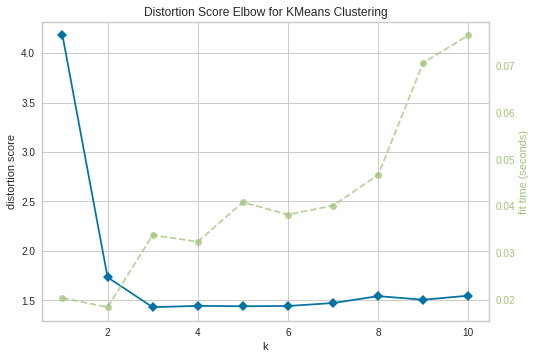

In [43]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11))
visualizer.fit(train_x)
visualizer.poof()

In [44]:
!pip install kneed

In [45]:
# 그래프 확인 없이 최적 k값을 자동으로 찾아줌
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow

3

In [46]:
kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow_y

59.499186507936514

- k가 3일 때, y가 59.499인 것을 확인할 수 있음.

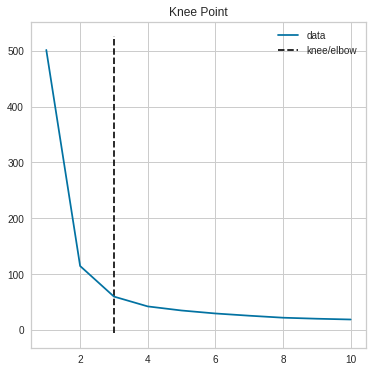

In [47]:
kneedle.plot_knee()

### Silhouette method
> Cluster 내의 거리와 clusterrksdml 거리를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.

> SC해석이란?

> 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을 수록 군집 분석의 성능이 좋음. 

>Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울 수록 clustering의 결과가 좋지 않음을 의미.

In [48]:
# silhouette_score는 array 형태를 읽을 수 있으며, 군집 간의 거리 계산을 필요로 하기에 최소 2개 이상의 label/cluster가 있어야 함.
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  label=km.predict(train_x)
  sc_value=silhouette_score(np.array(train_x), label, metric='euclidean', sample_size=None, random_state=None)
  silhouette_scores.append(sc_value)

print(silhouette_scores)

2
3
4
5
6
7
8
9
10
[0.6797023514369608, 0.545035485955998, 0.4935156171081678, 0.48312777785293193, 0.3668578058579345, 0.35457717819992474, 0.34534642132982124, 0.3512207831785092, 0.3022111007073419]


In [49]:
fig = px.line(x=k_range, y=silhouette_scores, labels={"x":"k","y":"silhouette scores"})
fig.update_layout(width=800, height=500)
fig.show()

2


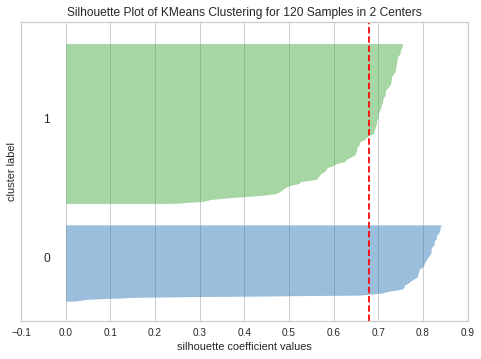

3


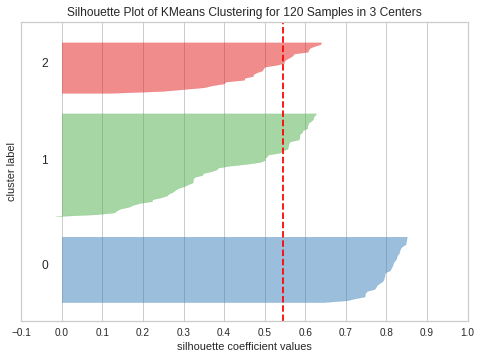

4


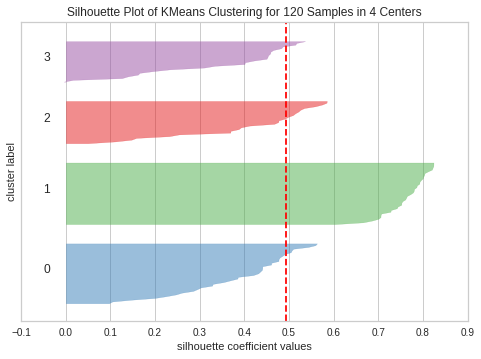

5


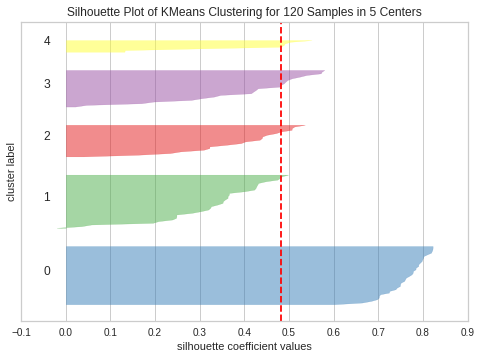

6


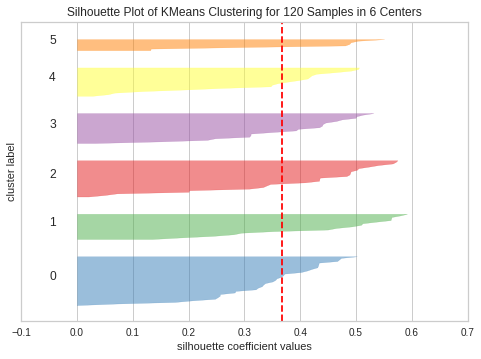

7


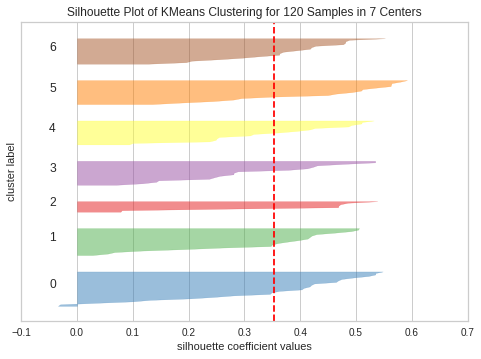

8


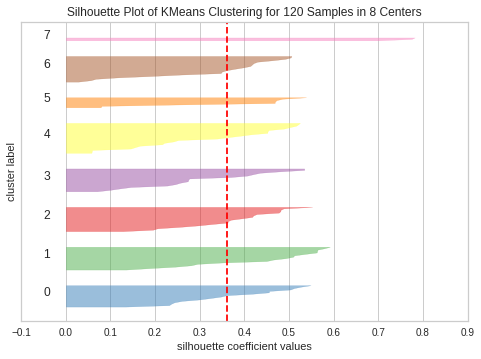

9


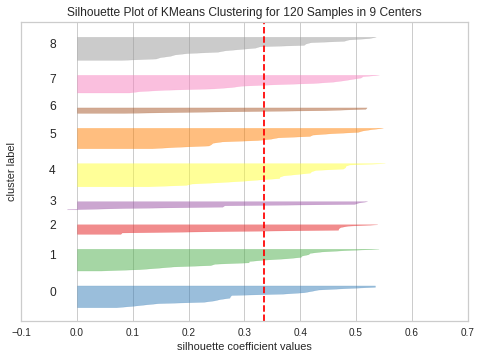

10


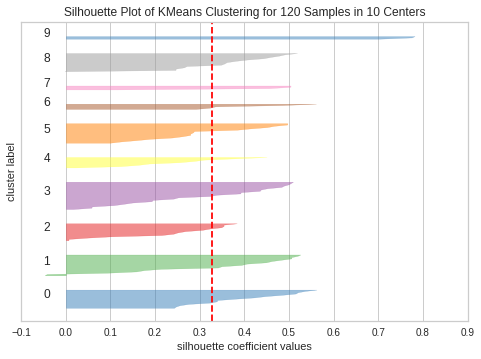

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
k_range = range(2,11)
for i in k_range:
  print(i)
  km=KMeans(n_clusters=i)
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [54]:
# 최적의 k를 할당하고 k-means model 훈련
k = 3
km = KMeans(n_clusters=k).fit(train_x)
train_cluster = km.labels_
train_cluster

array([2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [61]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [62]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [63]:
# prediction
test_cluster = km.fit_predict(test_x)
test_cluster

array([2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [64]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [65]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [67]:
# 수치화 평가 - accuracy score
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_cluster)
print(train_acc)

0.875


In [68]:
test_acc = accuracy_score(test_y, test_cluster)
print(test_acc)

0.06666666666666667


In [69]:
# 실제 cluster명과 매칭해주는 함수 만들기
import scipy

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  actual_case = list(set(actual_labels))
  for i in cluster_case:
    idx = cluster_labels == i
    new_label = scipy.stats.mode(actual_labels[idx])[0][0]
    actual_case.remove(new_label)
    matched_cluster[i] = new_label
    print(f"훈련된 label명 : {i} >> 가장 빈번한 실제 label명 : {new_label}")
  return matched_cluster

In [70]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [71]:
train_param_dict = find_matching_cluster(km_train_case, train_y,train_cluster)
train_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 2


{0: 0, 1: 1, 2: 2}

In [72]:
km_test_case = list(set(test_cluster))
print(km_test_case)

[0, 1, 2]


In [74]:
test_param_dict = find_matching_cluster(km_test_case, test_y,test_cluster)
test_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 2
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 0


{0: 1, 1: 2, 2: 0}

In [75]:
train_new_labels = [train_param_dict[label] for label in train_cluster]
test_new_labels = [test_param_dict[label] for label in test_cluster]

[0,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 2]

In [78]:
train_acc = accuracy_score(train_y, train_new_labels)
test_acc = accuracy_score(test_y, test_new_labels)

print(train_acc, test_acc)

0.875 0.9333333333333333
